In [1]:
import itertools
import numpy as np
from matplotlib import pyplot as plt

import local

In [2]:
DATA = local.Data151v()

# Varallisuusosuudet

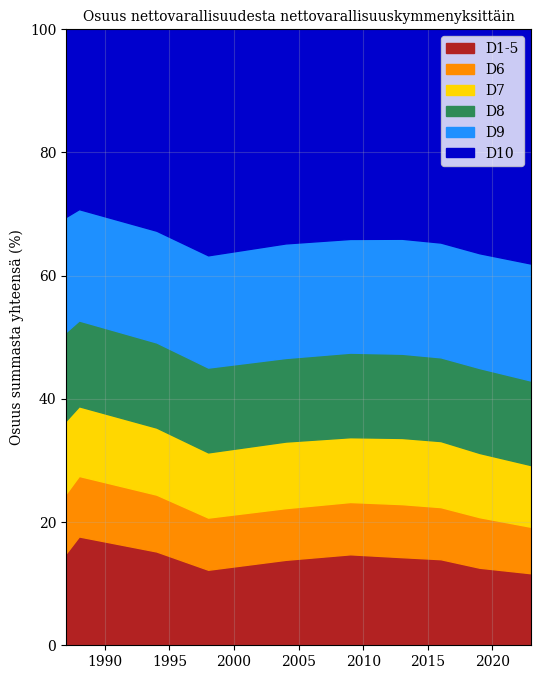

In [3]:
plt.figure(figsize=(6, 8))
local.plot.osuudet(plt.gca(), DATA, "nt", "vr", local.colors.colors6b())
plt.title("Osuus nettovarallisuudesta nettovarallisuuskymmenyksittäin")
plt.savefig("osuus.png", bbox_inches="tight", dpi=150)
plt.show()

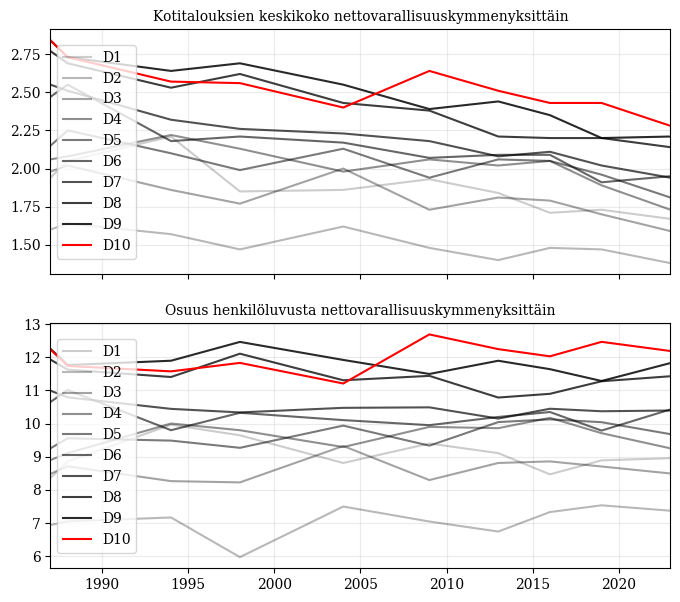

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(8, 7), sharex=True)
for d in DATA.luokat10:
    ax[0].plot(DATA.vuosi, DATA.h(d, "n", "hsz"), color=local.colors.colors10()[d], label=d)
    ax[1].plot(DATA.vuosi, DATA.hf(d, "n", "szt"), color=local.colors.colors10()[d], label=d)
ax[0].set_xlim(*DATA.vlim)
ax[0].legend(loc="center left")
ax[1].legend(loc="center left")
ax[0].set_title("Kotitalouksien keskikoko nettovarallisuuskymmenyksittäin")
ax[1].set_title("Osuus henkilöluvusta nettovarallisuuskymmenyksittäin")
plt.show()

# Varojen kehitys lajeittain

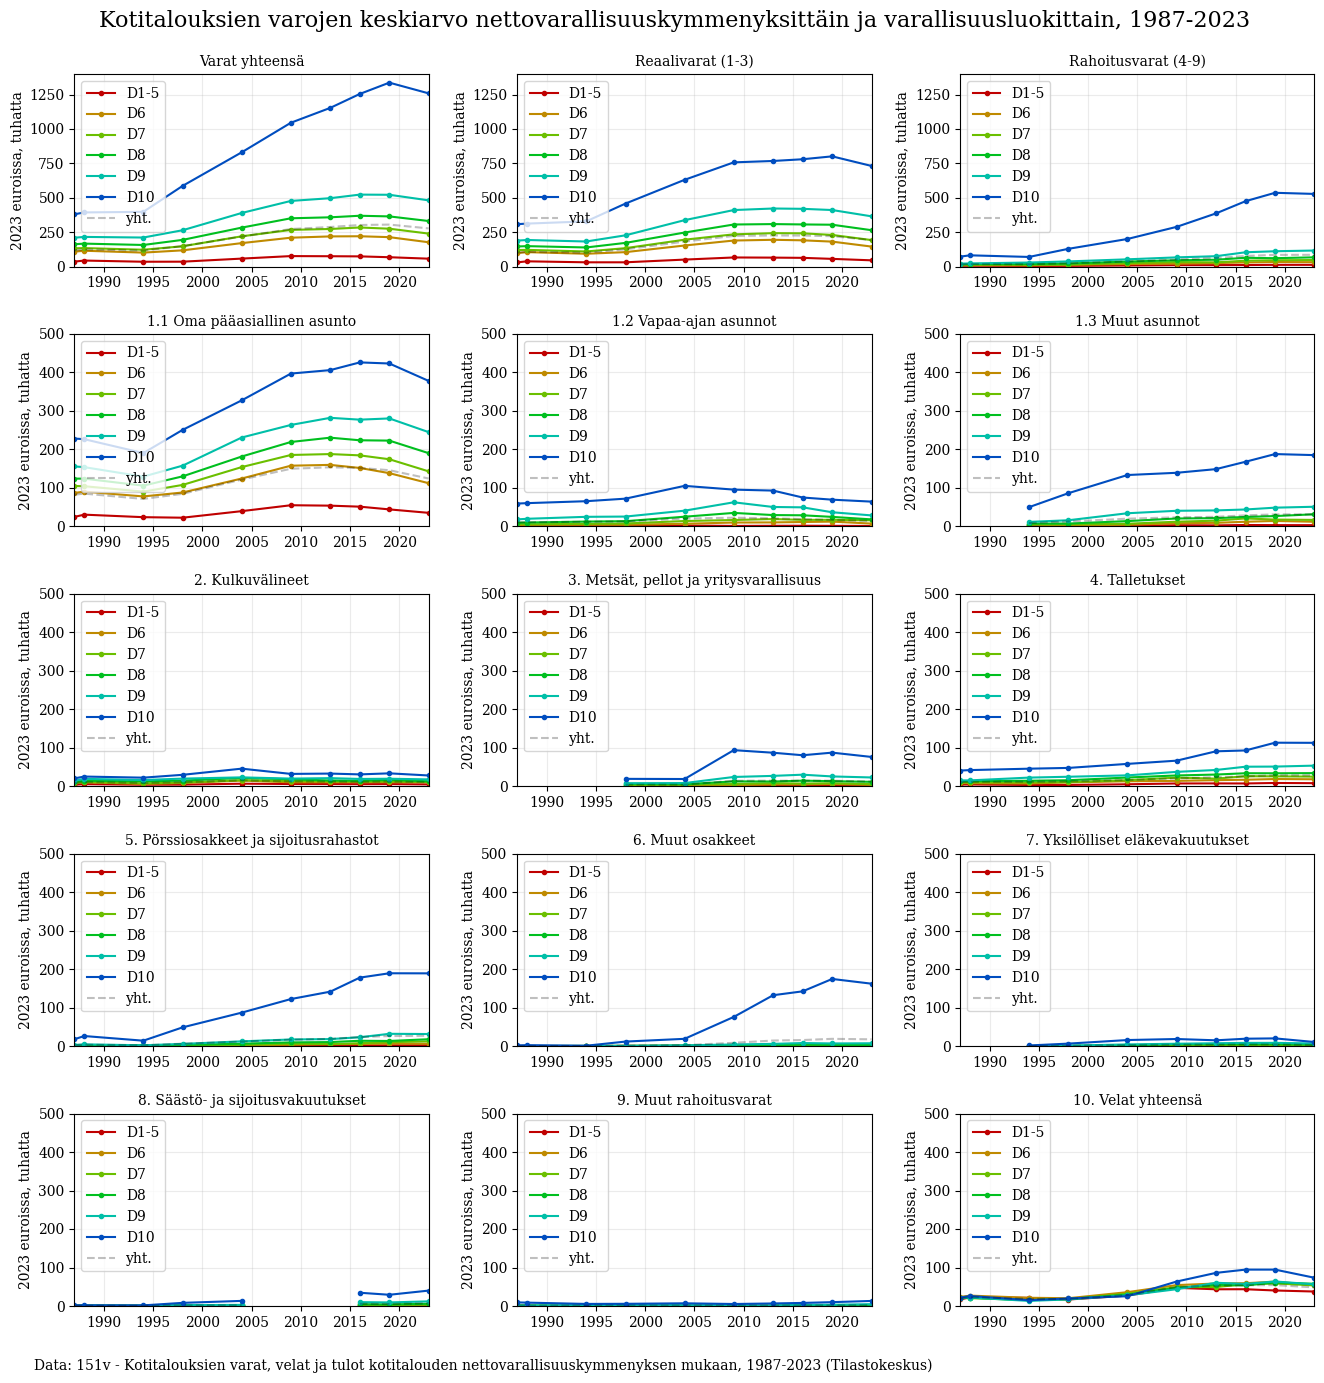

In [5]:
lajit = ("g", "vr", "vf", "a11", "a12", "a13", "a2", "a3", "a4", "a5", "a6", "a7", "a8", "a9", "la")
ylim = [1400] * 3 + [500] * 12

def summa(d, l):
    y = DATA.h(d, l, "rm") / 1e3
    y[y == 0] = np.nan
    return y
    
fig, ax = plt.subplots(5, 3, figsize=(16, 16))
ax = local.plot.flatax(ax)

local.plot.lajeittain(fig, ax, DATA, lajit, summa, "2023 euroissa, tuhatta", ylim)
plt.suptitle("Kotitalouksien varojen keskiarvo nettovarallisuuskymmenyksittäin ja varallisuusluokittain, 1987-2023", y=0.92)
plt.savefig("varat.png", bbox_inches="tight", dpi=150)
plt.show()

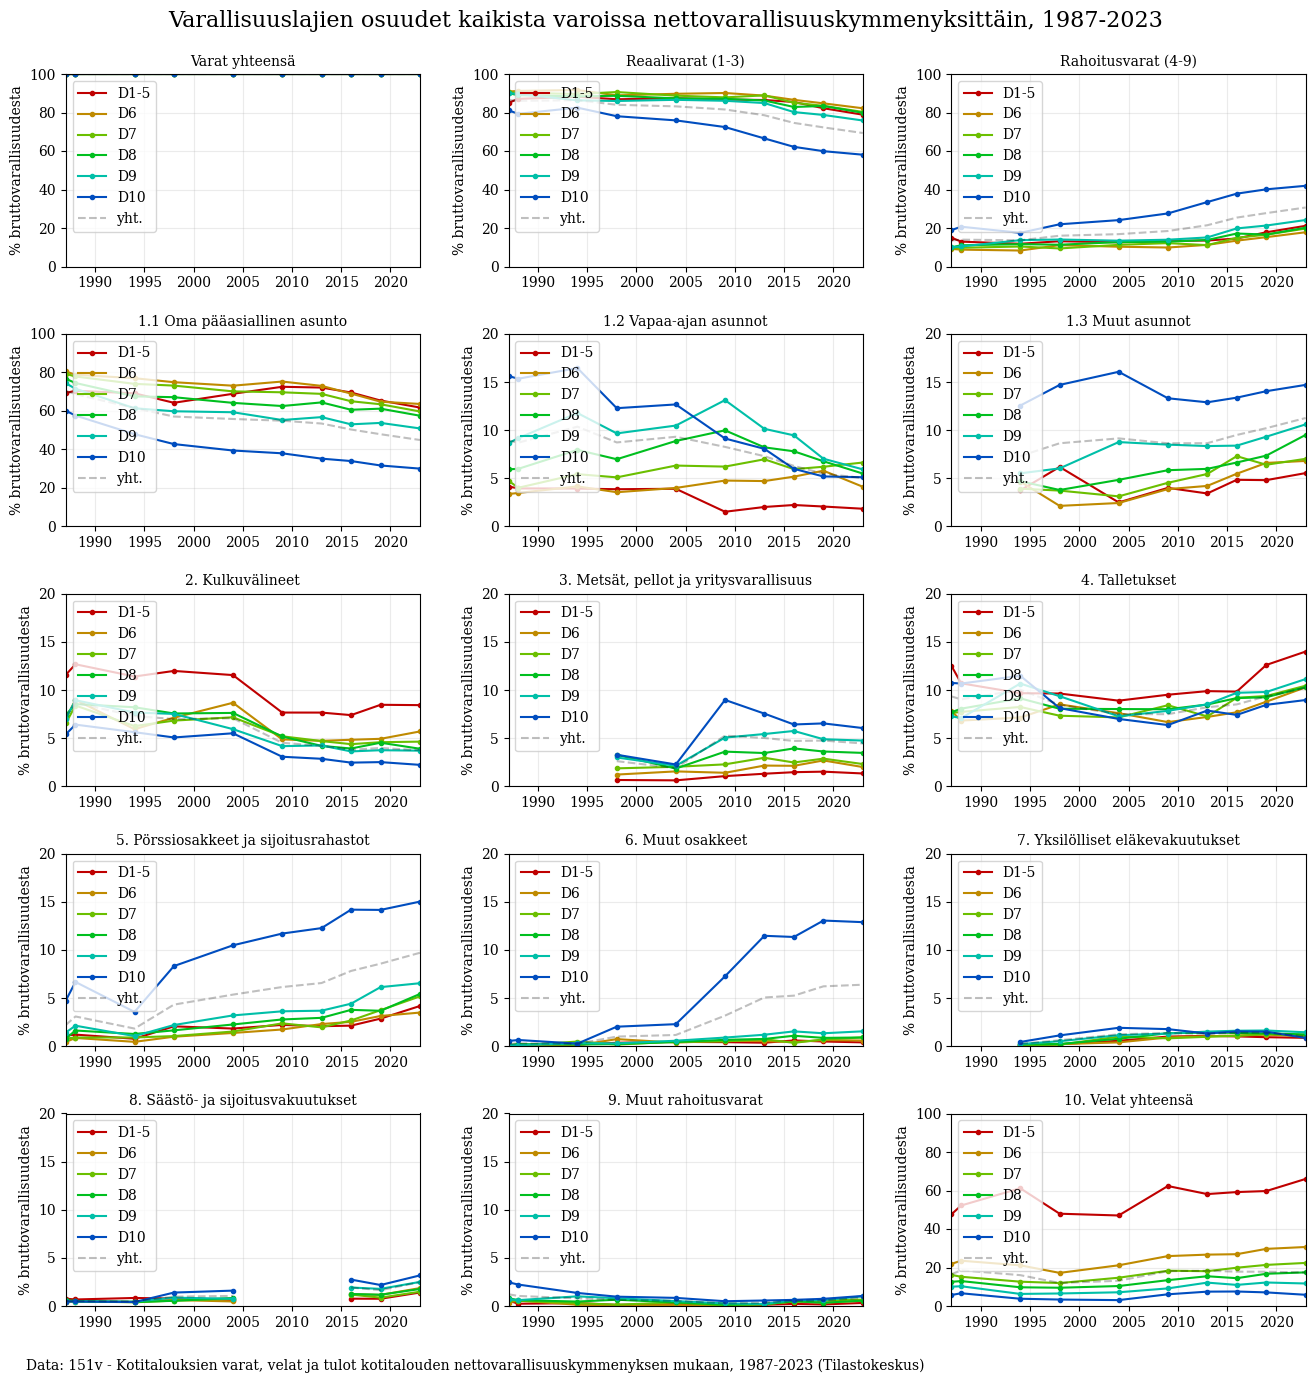

In [6]:
ylim = [100] * 4 + [20] * 10 + [100]

def osuus(d, l):
    y = 100 * DATA.h(d, l, "rm") / DATA.h(d, "g", "rm")
    y[y == 0] = np.nan
    return y
    
fig, ax = plt.subplots(5, 3, figsize=(16, 16))
ax = local.plot.flatax(ax)

local.plot.lajeittain(fig, ax, DATA, lajit, osuus, "% bruttovarallisuudesta", ylim)
plt.suptitle("Varallisuuslajien osuudet kaikista varoissa nettovarallisuuskymmenyksittäin, 1987-2023", y=0.92)
plt.savefig("varat_rel.png", bbox_inches="tight", dpi=150)
plt.show()

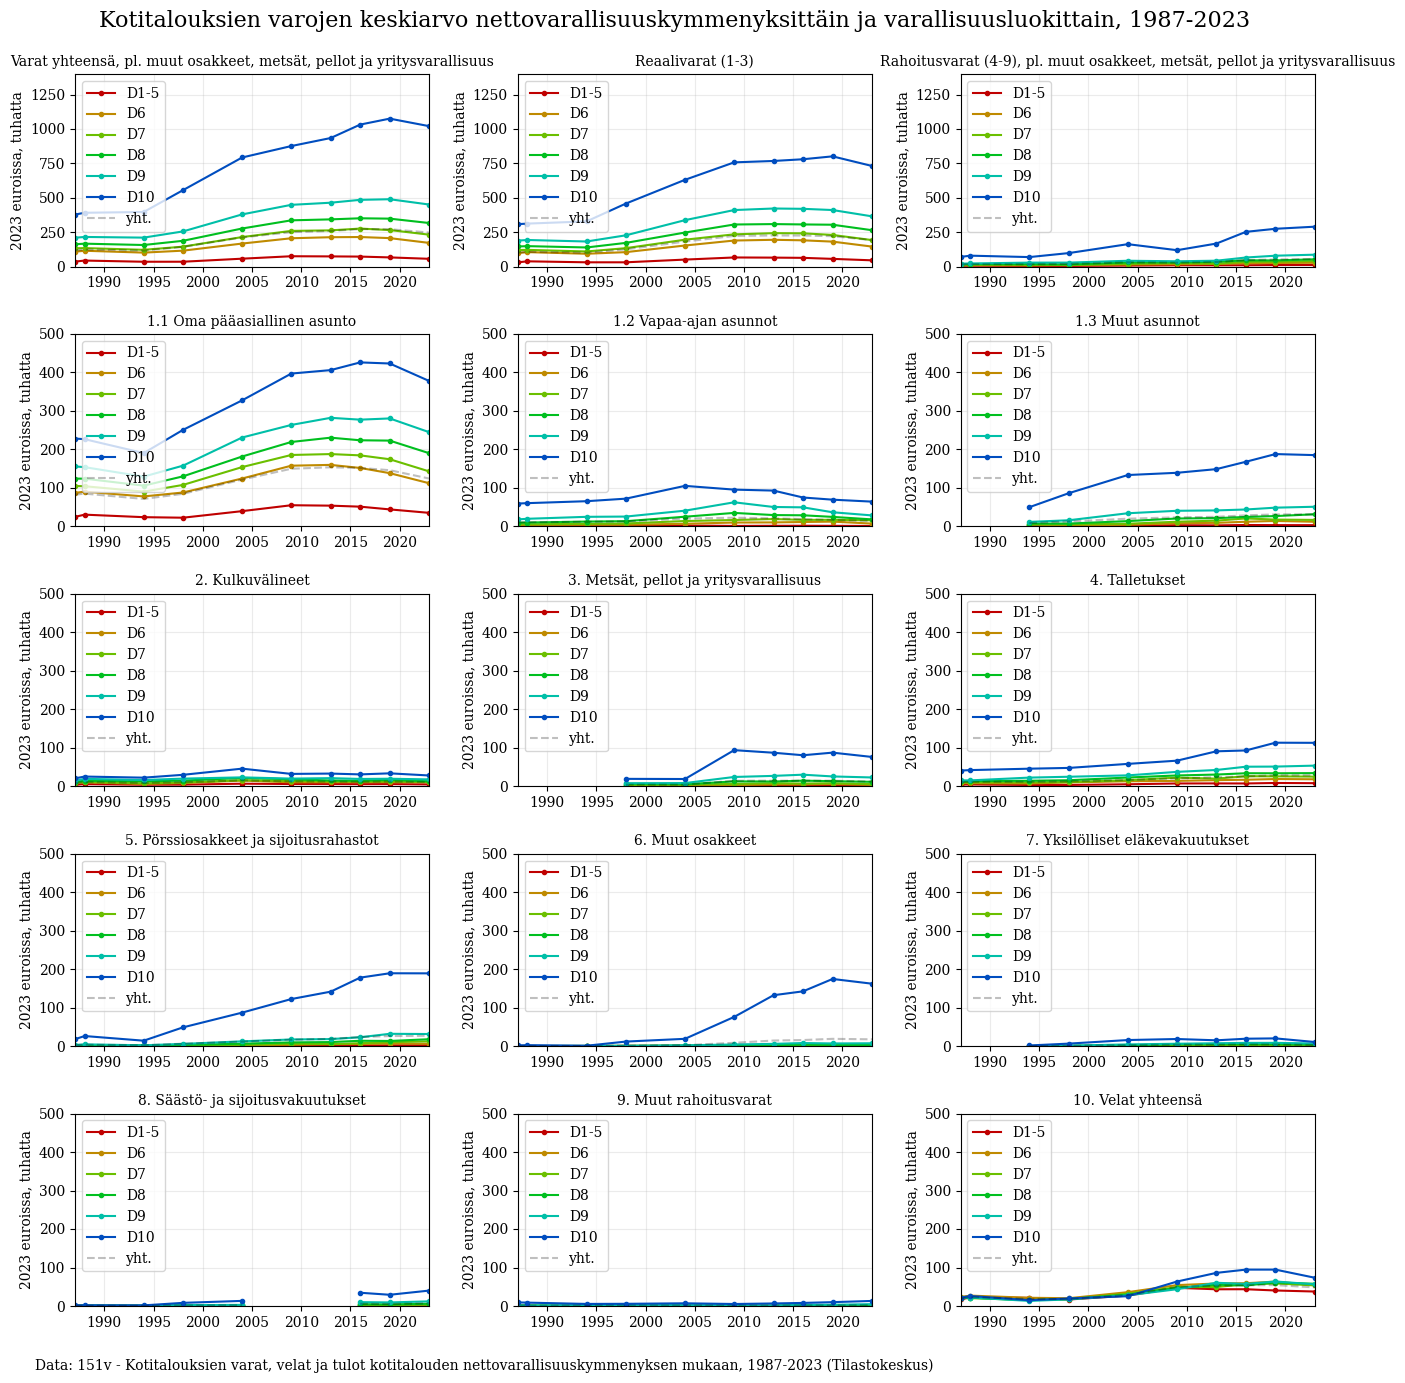

In [7]:
lajit = ("g--", "vr", "vf--", "a11", "a12", "a13", "a2", "a3", "a4", "a5", "a6", "a7", "a8", "a9", "la")
ylim = [1400] * 3 + [500] * 12

def summa(d, l):
    y = DATA.h(d, l, "rm") / 1e3
    y[y == 0] = np.nan
    return y
    
fig, ax = plt.subplots(5, 3, figsize=(16, 16))
ax = local.plot.flatax(ax)

local.plot.lajeittain(fig, ax, DATA, lajit, summa, "2023 euroissa, tuhatta", ylim)
plt.suptitle("Kotitalouksien varojen keskiarvo nettovarallisuuskymmenyksittäin ja varallisuusluokittain, 1987-2023", y=0.92)
plt.savefig("varat.png", bbox_inches="tight", dpi=150)
plt.show()

In [ ]:
lajit = ("g--", "vr", "vf--", "a11", "a12", "a13", "a2", "a3", "a4", "a5", "a6", "a7", "a8", "a9", "la")
ylim = [100] * 4 + [20] * 10 + [100]

def osuus(d, l):
    y = 100 * DATA.h(d, l, "rm") / DATA.h(d, "g--", "rm")
    y[y == 0] = np.nan
    return y
    
fig, ax = plt.subplots(5, 3, figsize=(16, 16))
ax = local.plot.flatax(ax)

local.plot.lajeittain(fig, ax, DATA, lajit, osuus, "% bruttovarallisuudesta", ylim)
plt.suptitle("Varallisuuslajien osuudet kaikista varoissa nettovarallisuuskymmenyksittäin, 1987-2023", y=0.92)
plt.savefig("varat_rel.png", bbox_inches="tight", dpi=150)
plt.show()